In [1]:
#10/9/24 Analyses drugbank Results

import pandas as pd
import numpy as np

In [2]:
#Read NN results
#this is in a text file as the model creator cannot keep variables to maintain memory limits

with open('/Users/james/Documents/Honours/Results/Figure_Development/DrugBank Targets/modelout/drugbankNNout.txt', 'r') as file:
    text = file.read()
    
import re

pattern = re.compile(r'\bmcc = .+$', re.MULTILINE)
lines = pattern.findall(text)

# Print or process the matching lines
results = []
for line in lines:
    results.append(float(line[6:]))

In [3]:
results

[0.47075654176200415,
 0.36815187809805633,
 0.09614414947874673,
 0.37741470621203443,
 0.30903502310036884,
 0.016037507477489603,
 0.25617376914899,
 0.16031913292187264,
 0.2412090756622109,
 0.5301448025829223,
 0.0,
 0.0,
 0.3814882103344266,
 0.3927922024247863,
 0.378565498830142,
 0.2020970962315822,
 0.24006495872533354,
 0.7888596970330195,
 0.17407765595569785]

In [45]:
import os
datasets = []
index = []
directory = '/Users/james/Documents/Honours/Results/Figure_Development/DrugBank Targets/modelout/'
namelist = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if 'csv' in filename:
        pathname = directory + file
        df = pd.read_csv(pathname)
        datasets.append(df)
        namelist.append(filename)

In [46]:
temp = datasets[1]
datasets[1] = datasets[0]
datasets[0] = temp

temp = namelist[1]
namelist[1] = namelist[0]
namelist[0] = temp

In [47]:
namelist

['drugbank_svm.csv', 'drugbank_rf.csv', 'drugbank_knn.csv']

In [49]:
index = ['SVM', 'RF', 'KNN', 'NN']

In [50]:
mcclist = []
for data in datasets:
    mcclist.append(data['MCC'].values.tolist())
mcclist.append(results)

In [51]:
datalist = datasets[0]['Dataset'].values
temp = []
for item in datalist:
    temp.append(item[:-14])
datalist = temp

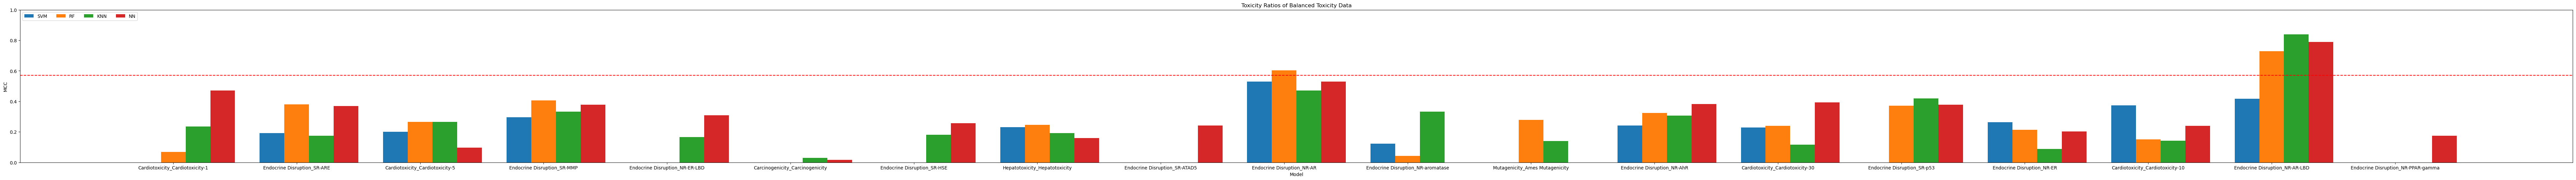

In [52]:
import matplotlib.pyplot as plt
data = mcclist

models = ('Sample Count', 'Positive Samples', 'Negative Samples')
x = np.arange(len(datalist))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0


fig, ax = plt.subplots(figsize=(100, 6))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

ax.set_ylabel('MCC')
ax.set_xlabel('Model')
ax.set_title('Toxicity Ratios of Balanced Toxicity Data')
ax.set_xticks(x + width, datalist)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.57, color='r', linestyle='--', label='Quality Threshold (0.57)')

plt.show()

In [53]:
import statistics
meanvals = []
loops = 0
for val in mcclist[0]:
    currdata = []
    for item in mcclist:
        currdata.append(item[loops])
    
    mean = statistics.mean(currdata)
    meanvals.append(mean)
    loops +=1

In [54]:
loops = 0
for val in meanvals:
    print(datalist[loops], ':', val)
    
    loops += 1

Cardiotoxicity_Cardiotoxicity-1 : 0.19362504597537428
Endocrine Disruption_SR-ARE : 0.2785484400384064
Cardiotoxicity_Cardiotoxicity-5 : 0.20754654834043249
Endocrine Disruption_SR-MMP : 0.3531507696367418
Endocrine Disruption_NR-ER-LBD : 0.11849806071720834
Carcinogenicity_Carcinogenicity : 0.011616634612499701
Endocrine Disruption_SR-HSE : 0.1092776213157316
Hepatotoxicity_Hepatotoxicity : 0.20745433191485332
Endocrine Disruption_SR-ATAD5 : 0.06030226891555272
Endocrine Disruption_NR-AR : 0.5333913143053329
Endocrine Disruption_NR-aromatase : 0.12464535258460067
Mutagenicity_Ames Mutagenicity : 0.1046726810633654
Endocrine Disruption_NR-AhR : 0.313039720336734
Cardiotoxicity_Cardiotoxicity-30 : 0.2435970243889359
Endocrine Disruption_SR-p53 : 0.29228233024622385
Endocrine Disruption_NR-ER : 0.19200049505875186
Cardiotoxicity_Cardiotoxicity-10 : 0.22654702895012865
Endocrine Disruption_NR-AR-LBD : 0.6928145853691825
Endocrine Disruption_NR-PPAR-gamma : 0.04351941398892446


In [55]:
loops = 0

srindex = []
nrindex = []
cardioindex = []
otherindex = []

for item in datalist:
    if 'SR-' in item:
        srindex.append(loops)
    if 'NR-' in item:
        nrindex.append(loops)
    if 'Cardio' in item:
        cardioindex.append(loops)
    if 'Mutag' in item or 'Carc' in item or 'Resp' in item or 'Hepa' in item:
        otherindex.append(loops)
    loops += 1
    
superlist = [srindex, nrindex, cardioindex, otherindex]
graphorder = ['Endocrine SR', 'Endocrine NR', 'Cardiotoxicity', 'Remaining Datasets']

In [56]:
endonames

['Carcinogenicity_Carcinogenicity',
 'Hepatotoxicity_Hepatotoxicity',
 'Mutagenicity_Ames Mutagenicity']

In [59]:
cardioindex

[0, 2, 13, 16]

In [64]:
cardioindex = [0, 2, 16, 13]

In [65]:
for item in cardioindex:
    print(datalist[item])

Cardiotoxicity_Cardiotoxicity-1
Cardiotoxicity_Cardiotoxicity-5
Cardiotoxicity_Cardiotoxicity-10
Cardiotoxicity_Cardiotoxicity-30


In [66]:
temp = datalist[16]
datalist[16] = datalist[13]
datalist[13] = temp

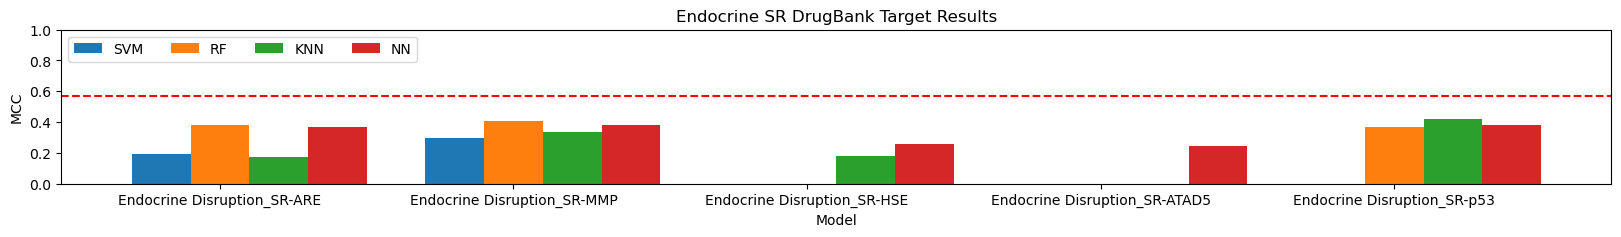

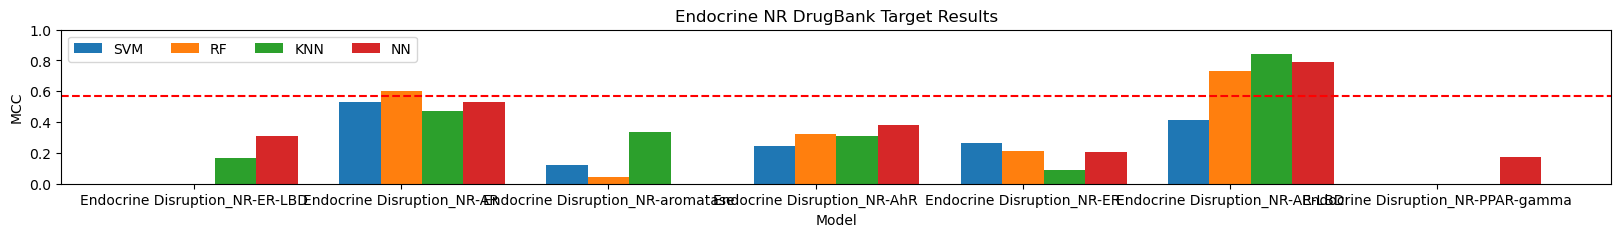

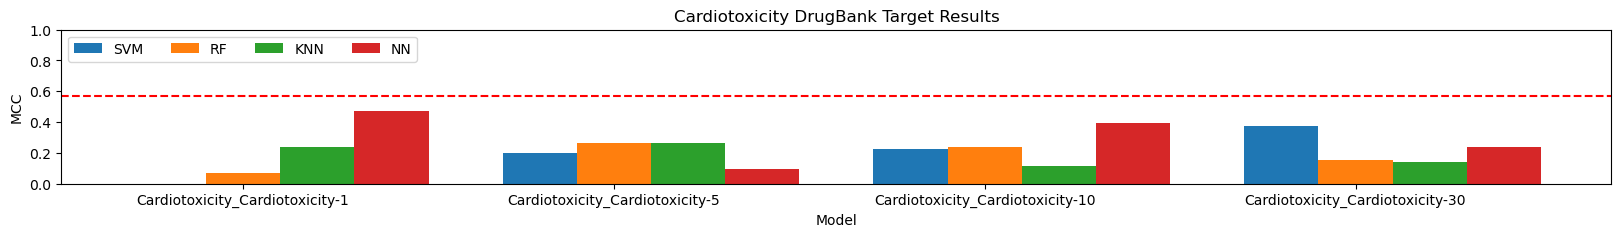

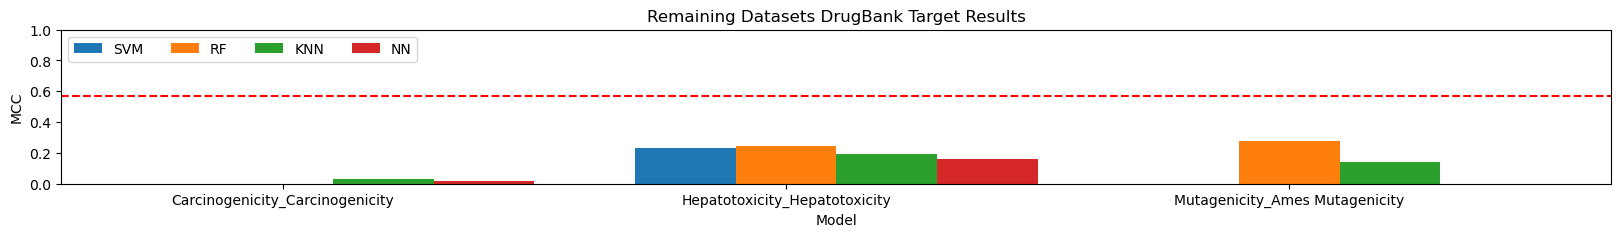

In [67]:
iterations = 0
for curr in superlist:
    endovals = [[], [], [], []]
    endonames = []
    for val in  curr:
        endovals[0].append(mcclist[0][val])
        endovals[1].append(mcclist[1][val])
        endovals[2].append(mcclist[2][val])
        endovals[3].append(mcclist[3][val])
        endonames.append(datalist[val])

    import matplotlib.pyplot as plt
    data = endovals

    x = np.arange(len(curr))  # the label locations
    width = 0.2  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(figsize=(20, 2))
    for measurement in data:
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('MCC')
    ax.set_xlabel('Model')
    graphname = graphorder[iterations] + ' DrugBank Target Results'
    ax.set_title(graphname)
#    temp = []
#    replace = 0
#    for item in endonames:
#        if 'Endocrine' in item:
#            item = item[21:]
#            temp.append(item)
#        replace = 1
#    if replace == 1:
#        endonames = temp
        
    ax.set_xticks(x + width, endonames)
    ax.legend(loc='upper left', ncols=4)
    ax.set_ylim(0, 1)
    plt.axhline(y=0.57, color='r', linestyle='--', label='Quality Cutoff (0.57)')

    plt.show()
    iterations +=1

In [58]:
import matplotlib.pyplot as plt
data = endovals

x = np.arange(len(endoindex))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(50, 6))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MCC')
ax.set_xlabel('Model')
ax.set_title('Chemop Endocrine Data Model Results')
ax.set_xticks(x + width, endonames)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.57, color='r', linestyle='--', label='Quality Threshold (0.57)')

plt.show()

NameError: name 'endoindex' is not defined

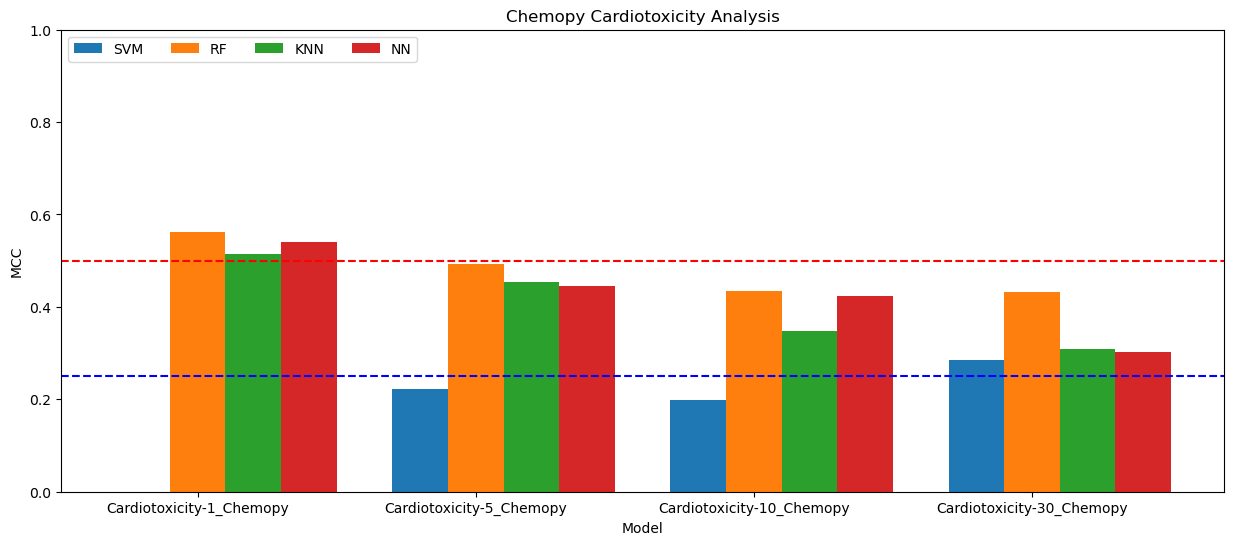

In [116]:
cardiovals = [[], [], [], []]
cardionames = []
for val in cardioindex:
    cardiovals[0].append(mcclist[0][val])
    cardiovals[1].append(mcclist[1][val])
    cardiovals[2].append(mcclist[2][val])
    cardiovals[3].append(mcclist[3][val])
    cardionames.append(datalist[val])
    
import matplotlib.pyplot as plt
data = cardiovals

x = np.arange(len(cardioindex))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(15, 6))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MCC')
ax.set_xlabel('Model')
ax.set_title('Chemopy Cardiotoxicity Analysis')
ax.set_xticks(x + width, cardionames)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.axhline(y=0.25, color='b', linestyle='--', label='y=0.25')

plt.show()

In [25]:
devrepvals = [[], [], [], []]
devrepnames = []
for val in devrepindex:
    devrepvals[0].append(mcclist[0][val])
    devrepvals[1].append(mcclist[1][val])
    devrepvals[2].append(mcclist[2][val])
    devrepvals[3].append(mcclist[3][val])
    devrepnames.append(datalist[val])
    
import matplotlib.pyplot as plt
data = devrepvals

x = np.arange(len(devrepindex))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(15, 6))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MCC')
ax.set_xlabel('Model')
ax.set_title('Chemopy Development & Reproductive Toxicity Analysis')
ax.set_xticks(x + width, devrepnames)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.axhline(y=0.25, color='b', linestyle='--', label='y=0.25')


plt.show()

NameError: name 'devrepindex' is not defined

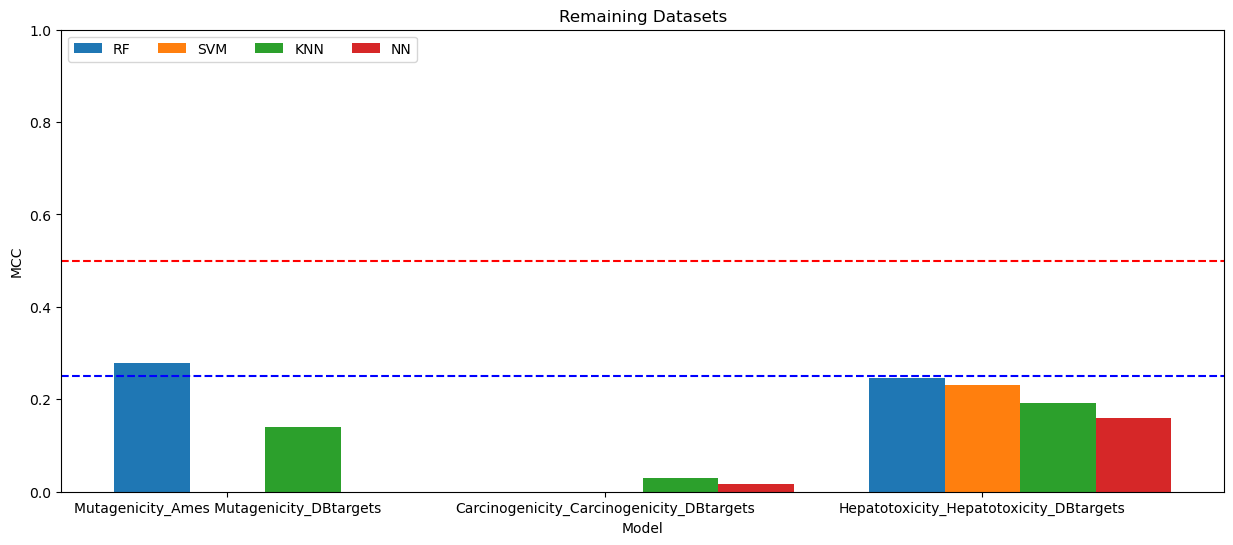

In [26]:
mutacarcheparespvals = [[], [], [], []]
mutacarcheparespnames = []
for val in mutacarcheparespindex:
    mutacarcheparespvals[0].append(mcclist[0][val])
    mutacarcheparespvals[1].append(mcclist[1][val])
    mutacarcheparespvals[2].append(mcclist[2][val])
    mutacarcheparespvals[3].append(mcclist[3][val])
    mutacarcheparespnames.append(datalist[val])
    
import matplotlib.pyplot as plt
data = mutacarcheparespvals

x = np.arange(len(mutacarcheparespindex))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(15, 6))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MCC')
ax.set_xlabel('Model')
ax.set_title('Remaining Datasets')
ax.set_xticks(x + width, mutacarcheparespnames)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.axhline(y=0.25, color='b', linestyle='--', label='y=0.25')

plt.show()

In [23]:
import sys
sys.path.insert(1, '/Users/james/Documents/Honours/Python') 
from Function_Repo import setbalance
import math


seed = 81
#Data import
rawdata = []
directory = '/Users/james/Documents/Honours/Data/ProcessedRaws/'
names = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if 'csv' in filename:
        pathname = directory + file
        df = pd.read_csv(pathname)
        df = setbalance(df)
        rawdata.append(df)
        names.append(filename[:-14])

In [24]:
samplecount = []
for item in rawdata:
    samplecount.append(len(item['Toxicity_Value'].values))

In [25]:
loops = 0
for item in names:
    print(item, ':', samplecount[loops])
    loops += 1

Cardiotoxicity-30 : 688
NR-AR-LBD : 480
Hepatotoxicity : 2889
SR-ARE : 2119
Respiratory_Toxicity : 1348
NR-AhR : 1674
SR-p53 : 847
Reproductive_Toxicity : 41
NR-ER : 1836
SR-HSE : 760
SR-MMP : 2106
SR-ATAD5 : 516
NR-PPAR-gamma : 365
Carcinogenicity : 1021
NR-ER-LBD : 726
Cardiotoxicity-10 : 1547
Cardiotoxicity-5 : 1547
NR-aromatase : 604
Developmental_Toxicity : 69
Ames_Mutagenicity : 7485
NR-AR : 625
Cardiotoxicity-1 : 1547


In [68]:
rf = 0
svm = 0
knn = 0
nn = 0
for item in mcclist[0]:
    svm = svm + item
for item in mcclist[1]:
    rf = rf + item
for item in mcclist[2]:
    knn = knn + item
for item in mcclist[3]:
    nn = nn + item

print(svm, rf, knn, nn)

3.0957016067752585 4.315724199595893 4.431360958685088 5.383331905979684


In [69]:
svm = 3.0957016067752585 + 10.125031196754726 + 6.241174292169159 + 0.7932862242202352
rf = 4.315724199595893 + 8.989697991601025 + 9.994398804048364 + 10.150063472304682
knn = 4.431360958685088 + 6.5040588616907975 + 8.307493310314088 + 8.40956166330152
nn = 5.383331905979684 + 6.493733912098253 + 8.80031959475731 + 9.02981037471998


In [88]:
meansvm = svm / 88
meanrf = rf / 88
meanknn = knn / 88
meannn = nn / 88

In [86]:
print(meansvm, meanrf, meanknn, meannn)

0.23017265136272022 0.38011232349488594 0.3142326681135397 0.3375817703131276


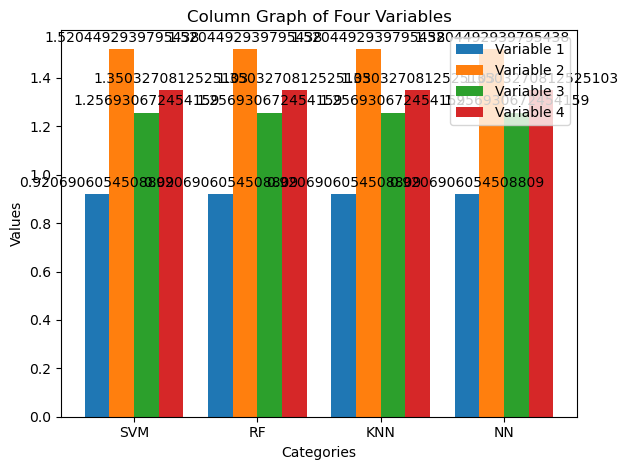

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['SVM', 'RF', 'KNN', 'NN']
variable_1 = meansvm
variable_2 = meanrf
variable_3 = meanknn
variable_4 = meannn

# Define the positions for the bars
x = np.arange(len(categories))  # The label locations
width = 0.2  # The width of the bars
tma


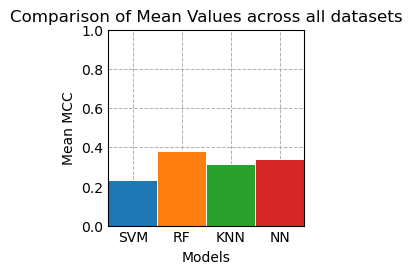

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Set the style
plt.style.use('_mpl-gallery')

# Sample data (replace these with your actual data)
x = 0.5 + np.arange(4)
y = [meansvm, meanrf, meanknn, meannn]

# Define colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create the plot
fig, ax = plt.subplots()

# Plotting the bars with color and edge color
bars = ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7, color=colors)

# Customize the axes
ax.set(xlim=(0, 4), xticks=np.arange(1, 4),
       ylim=(0, 1), yticks=np.arange(0, 1.1, 0.2))  # Adjusted ylim and yticks

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(['SVM', 'RF', 'KNN', 'NN'])  # Customize these labels as needed

# Set labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Mean MCC')
ax.set_title('Comparison of Mean Values across all datasets')

# Add a grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.7)

# Display the plot
plt.show()


In [97]:
total = 0
for item in mcclist:
    for thing in item:
        total = thing + total
bing = total / 88
print(bing)

0.19575134853449913


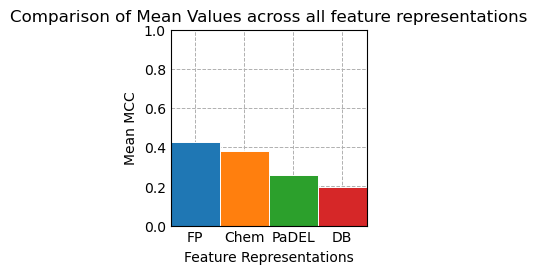

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Set the style
plt.style.use('_mpl-gallery')

# Sample data (replace these with your actual data)
x = 0.5 + np.arange(4)
y = [0.42680456862300675, 0.3806710303357414, 0.25887246579102624, 0.19575134853449913
]

# Define colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create the plot
fig, ax = plt.subplots()

# Plotting the bars with color and edge color
bars = ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7, color=colors)

# Customize the axes
ax.set(xlim=(0, 4), xticks=np.arange(1, 4),
       ylim=(0, 1), yticks=np.arange(0, 1.1, 0.2))  # Adjusted ylim and yticks

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(['FP', 'Chem', 'PaDEL', 'DB'])  # Customize these labels as needed

# Set labels and title
ax.set_xlabel('Feature Representations')
ax.set_ylabel('Mean MCC')
ax.set_title('Comparison of Mean Values across all feature representations')

# Add a grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.7)

# Display the plot
plt.show()
